<a href="https://colab.research.google.com/github/Pedro4010/caseifood/blob/main/caseifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/googlecolab/ml_project1_data.csv', index_col = 'ID')

Mounted at /content/drive


##### O conjunto de dados contém características sociodemográficas e firmográficas de cerca de 2.240 clientes que foram contatados. Além disso, contém um sinalizador para os clientes que responderam à campanha, comprando o produto.


**Feature** -> **Descrição**
*   AcceptedCmp1 -> 1 se o cliente aceitou a oferta na 1st campanha, 0 se não.
*   AcceptedCmp2 -> 1 se o cliente aceitou a oferta na 2st campanha, 0 se não.
*   AcceptedCmp3 -> 1 se o cliente aceitou a oferta na 3st campanha, 0 se não.
*   AcceptedCmp4 -> 1 se o cliente aceitou a oferta na 4st campanha, 0 se não.
*   AcceptedCmp5 -> 1 se o cliente aceitou a oferta na 5st campanha, 0 se não.
*   Response(target) -> 1 se o cliente aceitou a oferta na última campanha, 0 se não.
*   Complain -> 1 se o cliente reclamou nos últimos 2 anos
*   DtCustomer -> dados de cadastro do cliente na empresa
*   Education -> nível de instrução do cliente
*   Marital -> estado civil do cliente
*   Kidhome -> número de crianças pequenas na casa do cliente
*   Teenhome -> número de adolescentes na casa do cliente
*   Income -> renda familiar anual do cliente
*   MntFishProducts -> valor gasto em produtos de peixe nos últimos 2 anos 
*   MntMeatProducts -> valor gasto em produtos de carne nos últimos 2 anos
*   MntFruits -> valor gasto em produtos de frutas nos últimos 2 anos
*   MntSweetProducts -> valor gasto em produtos doces nos últimos 2 anos
*   MntWines -> valor gasto em produtos vitivinícolas nos últimos 2 anos
*   MntGoldProds -> valor gasto em produtos de ouro (especiais) nos últimos 2 anos
*   NumDealsPurchases -> número de compras feitas com desconto
*   NunCatalogPurchases -> número de compras feitas usando o catálogo
*   NunStorePurchases -> número de compras feitas diretamente nas lojas
*   NumWebPurchases -> número de compras feitas através do site da empresa 
*   NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
*   Recency -> número de dias desde a última compra    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


##### Em um primeiro olhar sobre o DataSet, optei por já eliminar algumas colunas que não fazem sentido em um primeiro momento. Dependendo do resultado das análises, talvez eu volte e acrescente-as.
##### A coluna ID do cliente se tornou meu índice, apenas um número de cadastro. Optei por remover as colunas Z_CostContact e Z_Revenue, visto que ambas possuem os mesmos valores por todo o DataSet. E como falei, em algum momento se achar relevante para o desenvolvimento da solução, elas podem ser recolocadas.

In [4]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [5]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [6]:
dfi = df.drop(columns=['Z_CostContact','Z_Revenue'])

In [7]:
dfi

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [8]:
dfi.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [9]:
# Usei esse comando apenas para verificar como estavam os dados das colunas que não apareciam com default.
pd.set_option('max_columns',28)

In [10]:
# Verificando se há valores nulos. Como podemos ver, temos 24 valores nulos em Income. Vamos utilizar uma média para tratar esses valores.
# Em alguns casos, seria mais adequado uma regressão linear, por exemplo, mas neste caso, a média e a mediana estão bem próximas, e isso é um fator relevante.
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [11]:
dfi.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [12]:
# Verificando um possível outlier na coluna Income.
# Transformar em um valor nulo e corrigir junto com os outros valores nulos
# dfi[dfi['Income']==666666]. Foi verificado que é um outlier.
dfi['Income'] = dfi['Income'].replace(666666, np.nan)

In [13]:
dfi.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 25
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [14]:
dfi['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [15]:
# Substituindo os valores nulos pela média.
# Rodamos o somatório de nulos novamente e a operação foi realizada. Não há mais valores nulos em dfi.
dfi['Income'] = dfi['Income'].replace(np.nan, dfi['Income'].mean())

In [16]:
# Criando uma coluna com o número de pessoas que aderiram a campanha. ????

dfi['Total_Accepted'] = df['AcceptedCmp1'] + dfi['AcceptedCmp2'] + dfi['AcceptedCmp3'] + dfi['AcceptedCmp4'] + dfi['AcceptedCmp5'] 

In [17]:
dfi['Total_Accepted'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Total_Accepted, dtype: int64

In [18]:
# Transformando a coluna de Data.
dfi['Dt_Customer'] = pd.to_datetime(dfi['Dt_Customer'])

In [19]:
dfi['Age'] = datetime.now().year - dfi['Year_Birth']

In [20]:
dfi['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [21]:
# Em vez de pegar a data de hoje e ver há quanto tempo o cliente está, vamos olhar pelo cliente mais novo para o mais antigo.
dfi['Days_a_customer'] = dfi['Dt_Customer'].max() - dfi['Dt_Customer']

In [22]:
dfi['Days_a_customer'] = dfi['Days_a_customer'].apply(lambda x: x.days)

In [23]:
dfi['Days_a_customer']

ID
5524     663
2174     113
4141     312
6182     139
5324     161
        ... 
10870    381
4001      19
7270     155
8235     156
9405     622
Name: Days_a_customer, Length: 2240, dtype: int64

In [24]:
# Como tratar essa coluna ?
# Criar um map pra auxiliar.
dfi['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
marital_map = {
    'Married': 2,
    'Together': 2,
    'Single': 1,
    'Divorced': 1,
    'Widow': 1,
    'Alone': 1,
    'Absurd': 1,
    'YOLO': 1
    
}

In [26]:
dfi['Marital_Status_Custom'] = dfi['Marital_Status'].map(marital_map)

In [27]:
dfi['Marital_Status_Custom'].value_counts()

2    1444
1     796
Name: Marital_Status_Custom, dtype: int64

In [28]:
# Essa coluna por enquanto vai ficar assim. Se colocássemos de 0 a 4 os pesos poderiam mudar, talvez seja uma opção.
dfi['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [29]:
dfi['Total_childs'] = dfi['Kidhome'] + dfi['Teenhome']

In [30]:
# Criar uma coluna com o tamanho da família
dfi['Family_size'] = dfi['Total_childs'] + dfi['Marital_Status_Custom']

In [31]:
# Criar uma coluna com o total geral comprado de cada cliente, independente do produto.
dfi['MntTotal']= dfi.iloc[:, 8:14].sum(axis=1)

In [32]:
dfi

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,0,41,161,2,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,...,0,0,0,0,0,0,0,0,55,381,2,1,3,1341
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,...,0,0,0,1,0,0,0,1,76,19,2,3,5,444
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,...,0,1,0,0,0,0,0,1,41,155,1,0,1,1241


##### Como tratamos algumas colunas, as antigas podem ser excluídas, como Year_Birth e Dt_Customer. 

In [33]:
 dfi.drop(columns=['Year_Birth','Dt_Customer'],inplace=True)

In [34]:
customers = dfi.copy()

In [35]:
customers

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,0,0,41,161,2,1,3,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,0,0,0,55,381,2,1,3,1341
4001,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,...,0,0,0,1,0,0,0,1,76,19,2,3,5,444
7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,...,0,1,0,0,0,0,0,1,41,155,1,0,1,1241


In [36]:
customers.drop(columns=['Marital_Status','Kidhome','Teenhome'],inplace=True)

In [37]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [38]:
# Transformar a coluna Education para numérico
# Fazer isso com dummy. Aqui escolaridade não tem um peso.
education_map = {
    'PhD': 3,
    'Master': 3,
    'Graduation': 2,
    '2n Cycle': 2,
    'Basic': 1,   
}


In [39]:
customers['Education'] = customers['Education'].map(education_map)

In [40]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [41]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2240.0,2.358036,0.527432,1.0,2.00,2.0,3.00,3.0
Income,2240.0,51969.861400,21405.804535,1730.0,35538.75,51741.5,68275.75,162397.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


##### As colunas estão em um ponto de tratamento ok. Nesse ponto já conseguimos tirar vários insights.
##### Algumas das perguntas de negócios que podem ser respondidas com um tratamento prévio dos dados:
*   Qual a média de idade dos clientes que mais aderiram a campanha ?
*   Por qual mmeio esses clientes efetuaram as compras ?
*   Como é o comportamento dos clientes que usam cupons mas não aderem a campanha ?
*   





In [42]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [43]:
customers_4acc = customers[customers['Total_Accepted']==4]

In [44]:
customers_60K = customers[customers['Income']>60000.00]

In [45]:
customers_deals = customers[customers['NumDealsPurchases']>=5]

In [46]:
customers_deals

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422
5376,2,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,0,43,539,2,1,3,1730
1409,2,40689.0,69,270,3,27,39,6,99,7,7,1,5,8,0,0,0,0,0,0,0,0,71,468,2,1,3,444
7373,3,46610.0,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,1,0,70,608,1,2,3,302
4339,3,67353.0,37,702,17,151,0,8,35,5,5,6,12,2,0,0,0,0,0,0,0,0,52,180,2,1,3,913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2,41769.0,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,0,0,67,501,1,1,2,521
4749,2,58554.0,55,368,24,68,38,0,88,6,8,2,6,7,0,0,0,0,0,0,0,0,54,641,2,2,4,586
4478,2,63777.0,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,0,0,43,462,2,2,4,653


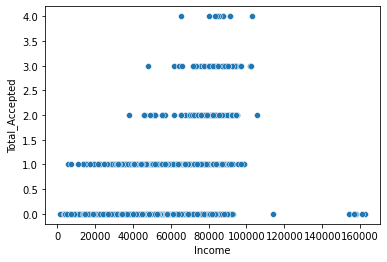

In [56]:
sns.scatterplot(x="Income", y = "Total_Accepted", data=customers)
plt.show()

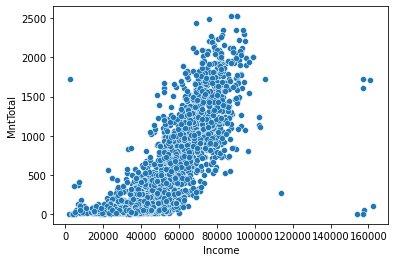

In [60]:
sns.scatterplot(x="Income", y = "MntTotal", data=customers)
plt.show()

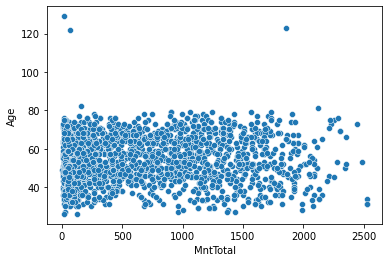

In [62]:
sns.scatterplot(x="MntTotal", y = "Age", data=customers)
plt.show()

In [ ]:
for col in customers.columns[1:]:
  sns.boxplot(data=customers[col], orient='h')
  plt.title(col)
  plt.show()

In [66]:
customers.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,65,663,1,0,1,1617
2174,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,68,113,1,2,3,27
4141,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,57,312,2,0,2,776
6182,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,38,139,2,1,3,53
5324,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,41,161,2,1,3,422


In [67]:
customers.describe()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.358036,51969.861400,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,0.297768,53.194196,353.582143,1.644643,0.950446,2.595089,605.798214
std,0.527432,21405.804535,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,0.678381,11.984069,202.122512,0.478728,0.751803,0.906959,602.249288
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000,1.000000,5.000000
25%,2.000000,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,180.750000,1.000000,0.000000,2.000000,68.750000
50%,2.000000,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,355.500000,2.000000,1.000000,3.000000,396.000000
75%,3.000000,68275.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,529.000000,2.000000,1.000000,3.000000,1045.500000
max,3.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,129.000000,699.000000,2.000000,3.000000,5.000000,2525.000000


In [47]:
# Insights. 
# A média de 'Income' é maior nos clientes que aderiram a campanha o maior número de vezes é cerca de 40% maior que no geral. 
# Nos que aderiram 3,2 ou 1 vez a campanha, o valor ganho médio é um fator a se considerar, e parece influenciar em quem aceita a campanha ou não, visto
# que a média diminui consideravelmente se lervamos apenas quem não aderiu em conta.
# Podemos também ver que os clientes que estão acima da média (no caso fiz para acima de 60K para criar uma margem um pouco maior) 
# em Income não tem aderido tanto a campanha, talvez eles sejam um bom foco.
# 2194 clientes fizeram pelo menos uma compra usando um cupom de desconto, um número muito maior do que os que somente aderiram a campanha.

### Clusterização

In [48]:
# Vamos fazer a clusterização agora, porém temos o target (Response), então separamos dele, precisamos do original, sem normalizar.

In [69]:
X = customers.drop('Response', axis=1)
Y = customers['Response']

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

In [73]:
X_scaled

array([[-0.67897965,  0.28821696,  0.30703926, ..., -1.2645053 ,
        -1.75911463,  1.67941681],
       [-0.67897965, -0.26287812, -0.38366418, ...,  1.39636071,
         0.44654827, -0.96127545],
       [-0.67897965,  0.91785967, -0.79808624, ..., -1.2645053 ,
        -0.65628318,  0.28267329],
       ...,
       [-0.67897965,  0.23415413,  1.44669994, ..., -1.2645053 ,
        -1.75911463,  1.05495122],
       [ 1.21742236,  0.80721077, -1.41971934, ...,  0.06592771,
         0.44654827,  0.39394775],
       [ 1.21742236,  0.04201381, -0.31459383, ...,  1.39636071,
         1.54937972, -0.7204576 ]])

In [79]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [80]:
X_scaled


,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Total_Accepted,Age,Days_a_customer,Marital_Status_Custom,Total_childs,Family_size,MntTotal
0,-0.678980,0.288217,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.985345,1.531185,-1.346874,-1.264505,-1.759115,1.679417
1,-0.678980,-0.262878,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.235733,-1.190545,-1.346874,1.396361,0.446548,-0.961275
2,-0.678980,0.917860,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.317643,-0.205773,0.742460,-1.264505,-0.656283,0.282673
3,-0.678980,-1.183301,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.268149,-1.061881,0.742460,0.065928,0.446548,-0.918094
4,1.217422,0.295460,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,-1.017761,-0.953012,0.742460,0.065928,0.446548,-0.305254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.678980,0.432369,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,0.150717,0.135680,0.742460,0.065928,0.446548,1.221032
2236,1.217422,0.562783,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,1.035390,1.903435,-1.655713,0.742460,2.726794,2.652211,-0.268717
2237,-0.678980,0.234154,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,1.035390,-1.017761,-0.982703,-1.346874,-1.264505,-1.759115,1.054951
2238,1.217422,0.807211,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.439037,1.068807,-0.977755,0.742460,0.065928,0.446548,0.393948


In [81]:
# Dados normalizados. Agora todas as colunas vão possuir o mesmo peso. 
# Para começo da clusterização, vamos tentar encontrar o melhor número de clusters.
# O método do cotovelo é bom para começo das análises 

In [82]:
from sklearn.cluster import KMeans

In [83]:
def elbow(values):
  wcss = []
  for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('WCSS')
  plt.show()

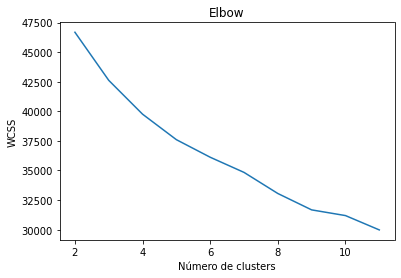

In [84]:
elbow(X_scaled)

In [85]:
# Talvez o método do cotovelo não tenha nos deixado próximo de um N ideal. 
# Vamos tentar com algumas análises com a biblioteca yellowbricks.

In [86]:
from yellowbrick.cluster import KElbowVisualizer

In [87]:
def elbow_yellow(values):
  kmeans = KMeans() 
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

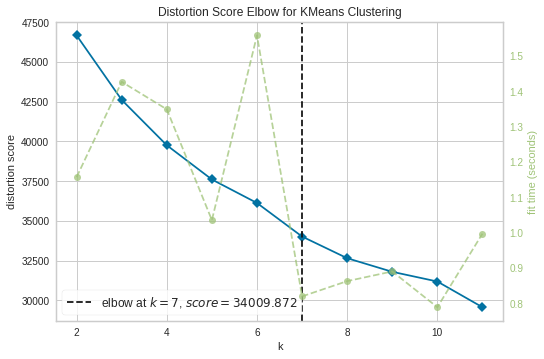

In [88]:
elbow_yellow(X_scaled)

In [93]:
from yellowbrick.cluster import SilhouetteVisualizer

In [99]:
def sillhouette(values, k):
  kmeans = KMeans(k) 
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(X_scaled)
  visualizer.show()

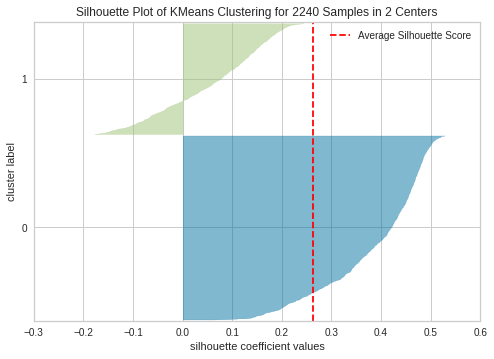

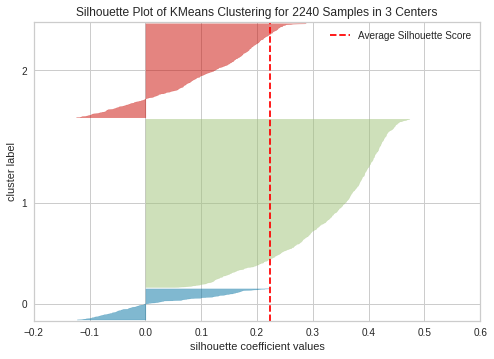

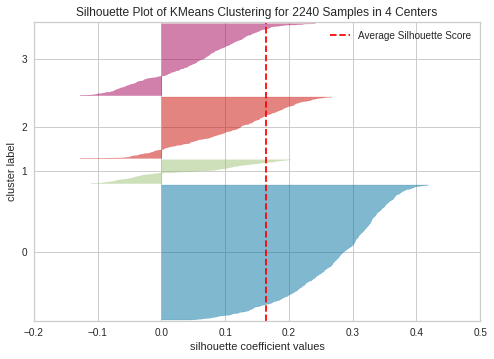

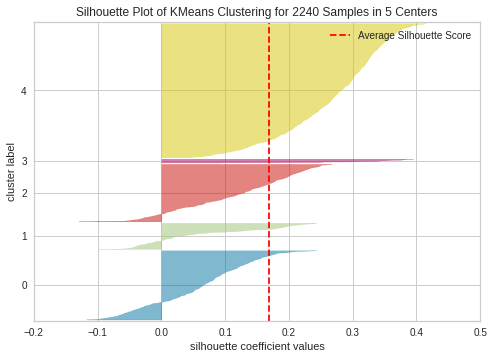

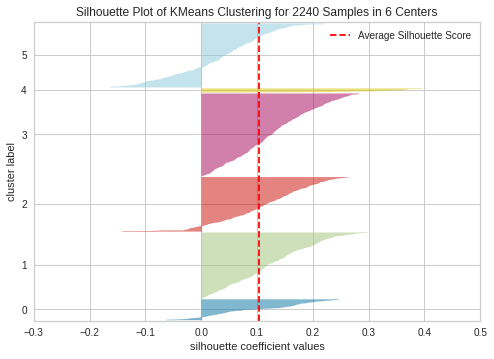

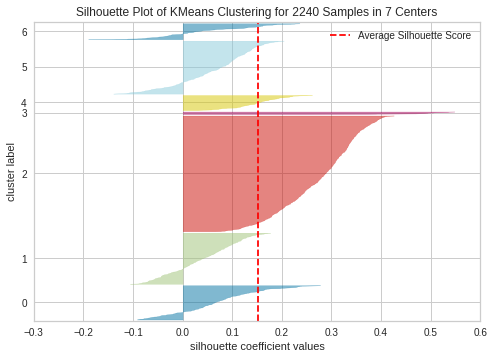

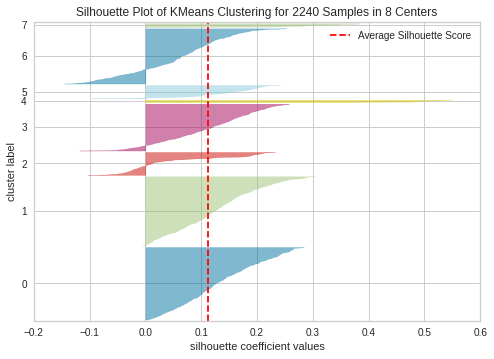

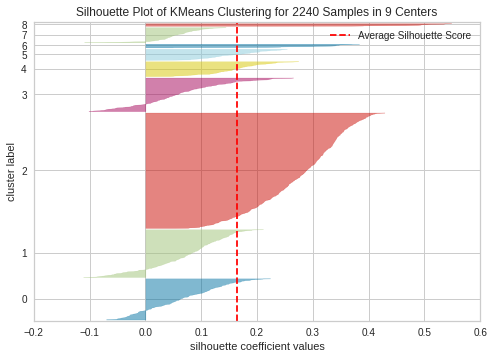

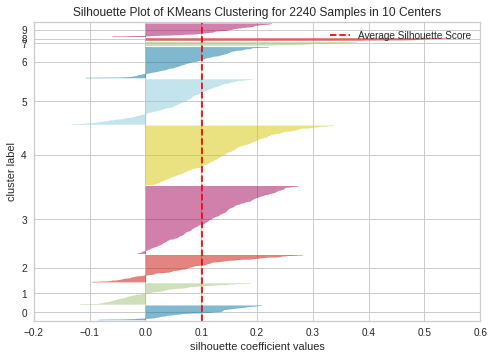

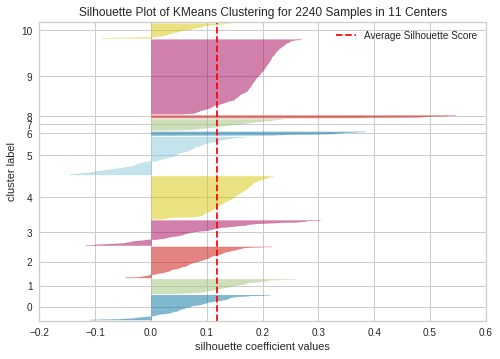

In [100]:
for i in range(2,12):
  sillhouette(X_scaled, i)

##### Reduzindo a dimensionalidade (poderia ter sido feito antes dessas análises)

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA()
pca.fit(X_scaled)
features = range(pca.n_components_)

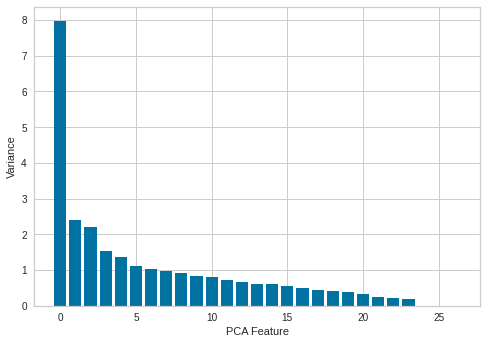

In [103]:
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [ ]:
# 4 ou 5 clusters vão ser minhas primeiras opções para lidar com esse problema.

In [107]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [108]:
X_pca

array([[ 4.05408854, -2.24359844,  0.79934624,  2.36407066],
       [-2.65074707, -0.07507024, -0.75934457, -1.04870819],
       [ 1.66425605, -1.33779504,  0.11999912, -0.2326465 ],
       ...,
       [ 2.36819447,  1.05064701, -1.65532882,  0.5379758 ],
       [ 1.40632343, -0.6882449 ,  1.21488664, -2.09843332],
       [-2.35425066,  0.66225779,  1.80248197, -0.90591927]])

In [109]:
df_X_pca = pd.DataFrame(X_pca, columns=(['PC0','PC1','PC2','PC3']))
df_X_pca

,PC0,PC1,PC2,PC3
0,4.054089,-2.243598,0.799346,2.364071
1,-2.650747,-0.075070,-0.759345,-1.048708
2,1.664256,-1.337795,0.119999,-0.232647
3,-2.647672,-0.150762,-1.084741,-0.188980
4,-0.487766,-0.357260,0.914014,-0.906837
...,...,...,...,...
2235,2.210785,-1.014764,1.934509,1.001387
2236,-1.139361,3.402712,3.172589,-2.344841
2237,2.368194,1.050647,-1.655329,0.537976
2238,1.406323,-0.688245,1.214887,-2.098433


In [55]:
# dfi = dfi[['Year_Birth','Dt_Customer','Education','Marital_Status','Income','Kidhome',
#'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
#'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
#'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']

#### Procurando entender as variáveis.

#### Em um primeiro momento, tentaremos olhar para a correlação e tentar entender o tipo de perfil de clientes que aceitaram a camapanha, em todas as fases.